
lab-random-variable-distributions

Refer to the numerical.csv dataset that you previously saved.

Instructions
Use the numerical variables from our dataset this week.
Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

data = pd.read_csv(r"C:\Users\torra\IH-Labs\lab-cleaning-categorical-data\file_numerical.csv") 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     9134 non-null   int64  
 1   customer_lifetime_value        9134 non-null   float64
 2   effective_to_date              9134 non-null   object 
 3   income                         9134 non-null   int64  
 4   monthly_premium_auto           9134 non-null   int64  
 5   months_since_last_claim        9134 non-null   int64  
 6   months_since_policy_inception  9134 non-null   int64  
 7   number_of_open_complaints      9134 non-null   int64  
 8   number_of_policies             9134 non-null   int64  
 9   total_claim_amount             9134 non-null   float64
dtypes: float64(2), int64(7), object(1)
memory usage: 713.7+ KB


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'customer_lifetime_value'}>,
        <Axes: title={'center': 'income'}>],
       [<Axes: title={'center': 'monthly_premium_auto'}>,
        <Axes: title={'center': 'months_since_last_claim'}>,
        <Axes: title={'center': 'months_since_policy_inception'}>],
       [<Axes: title={'center': 'number_of_open_complaints'}>,
        <Axes: title={'center': 'number_of_policies'}>,
        <Axes: title={'center': 'total_claim_amount'}>]], dtype=object)

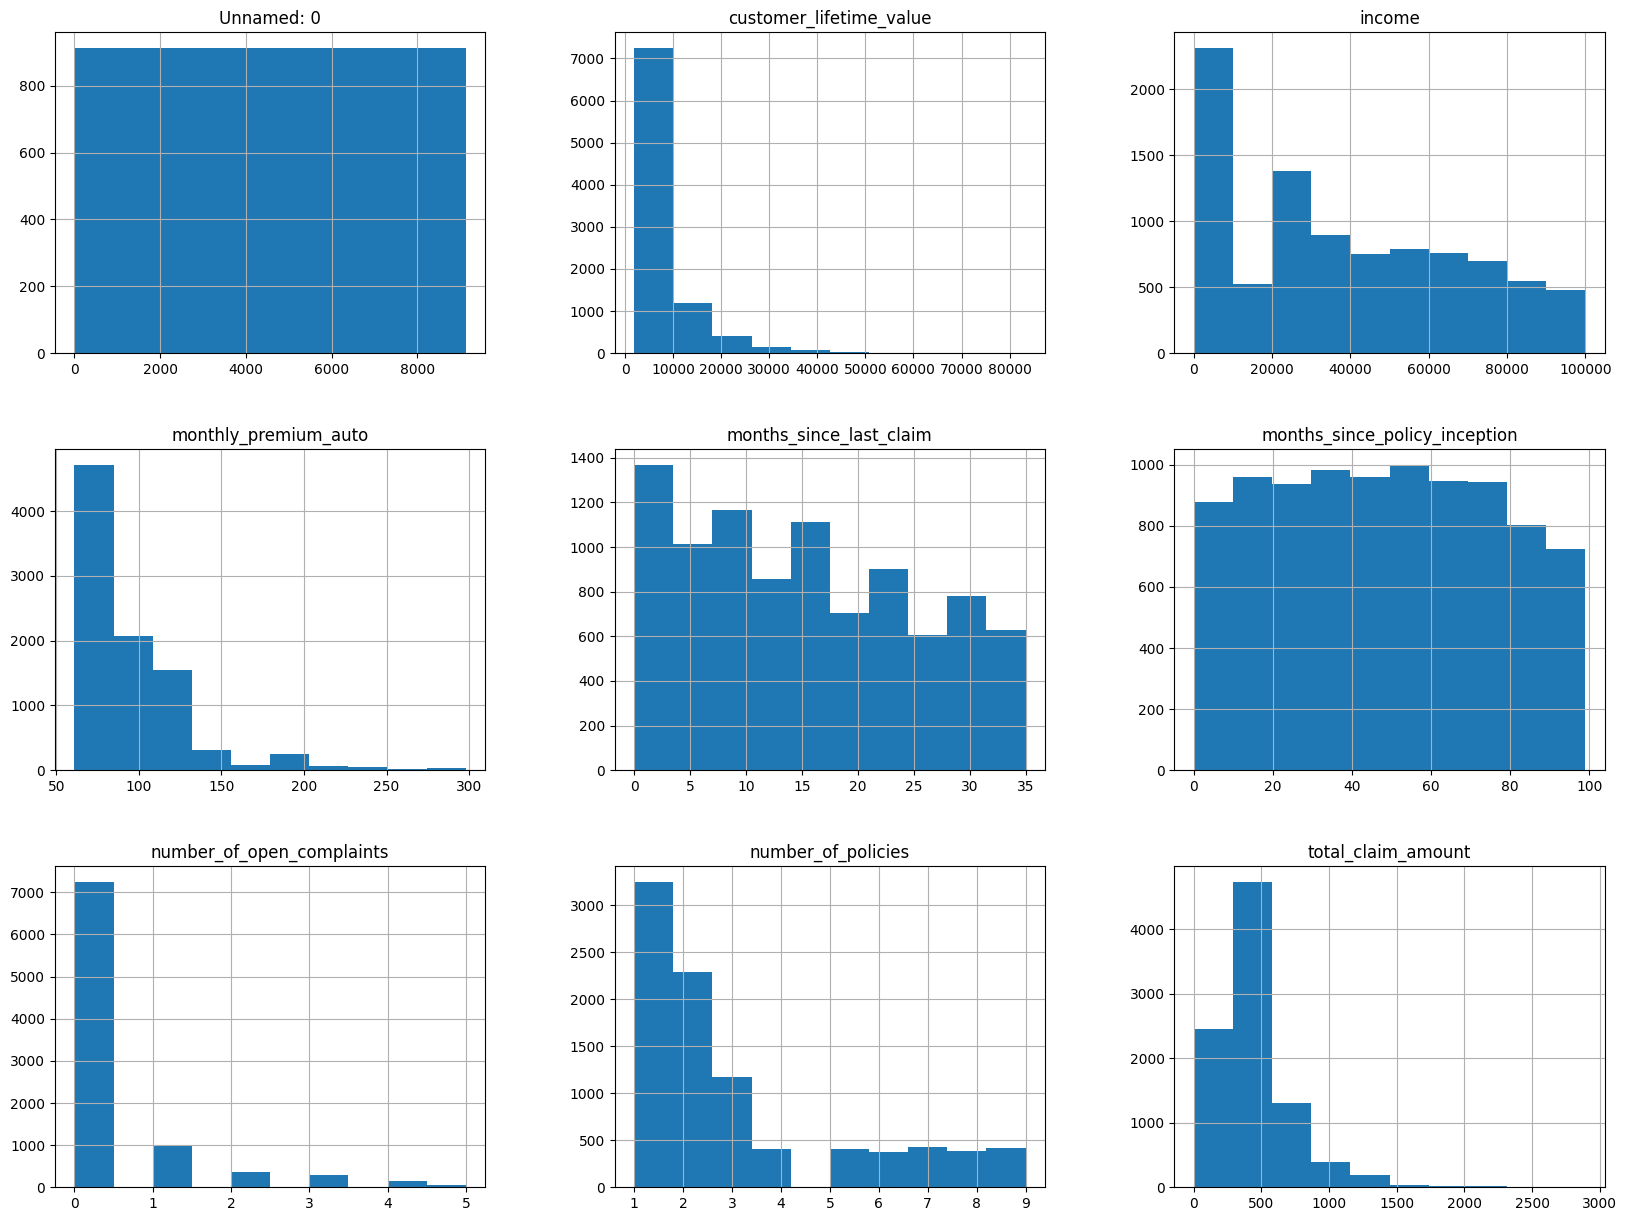

In [3]:
data.hist(figsize=(20,15))

A considerable proportion of the variables have a rigth-skewed distribution, that with a log-transformation could assimilate to a normal distribution.
The variable months since policy inception could be closer to an uniform distribution

In [9]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log)

data[["CLV_log","income_log","MPA_log","MLC_log","NOC_log","NP_log","TCA_log"]] = transformer.fit_transform(data[['customer_lifetime_value','income','monthly_premium_auto','months_since_last_claim','number_of_open_complaints','number_of_policies','total_claim_amount']])

C:\Users\torra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [ ]:
data.hist(figsize=(20,15))

array([[<Axes: title={'center': 'CLV_log'}>,
        <Axes: title={'center': 'customer_lifetime_value'}>]],
      dtype=object)

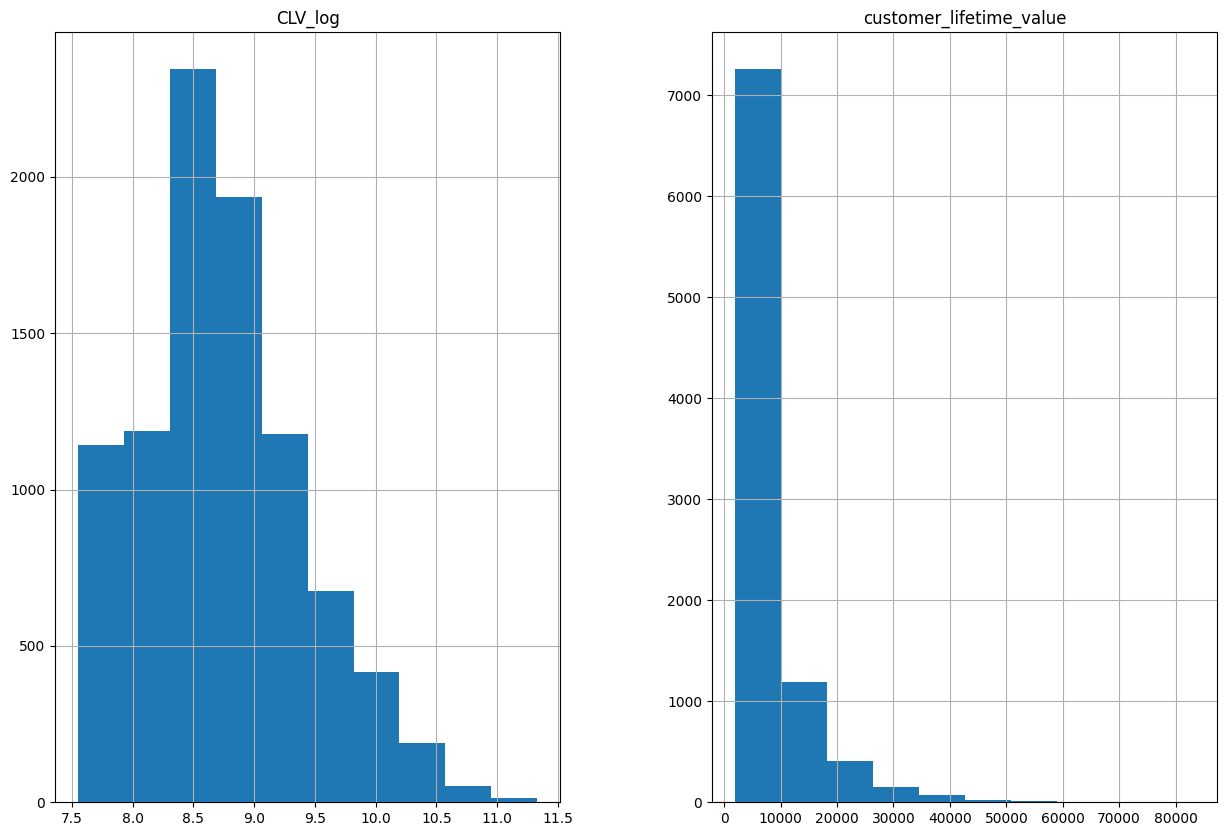

In [13]:
data.hist(column=["CLV_log","customer_lifetime_value"],figsize=(15,10))

The distribution of the variable (CLV_log) after the log transformation  is less skew, but it doesn't resemble a normal distribution

In [21]:
data=data[np.isfinite(data['income_log'])]

Error handling 
ValueError: supplied range of [-inf, 11.512735446917942] is not finite
use np.isfinite
link:https://stackoverflow.com/questions/51642846/python-histogram-valueerror-range-parameter-must-be-finite


array([[<Axes: title={'center': 'income_log'}>,
        <Axes: title={'center': 'income'}>]], dtype=object)

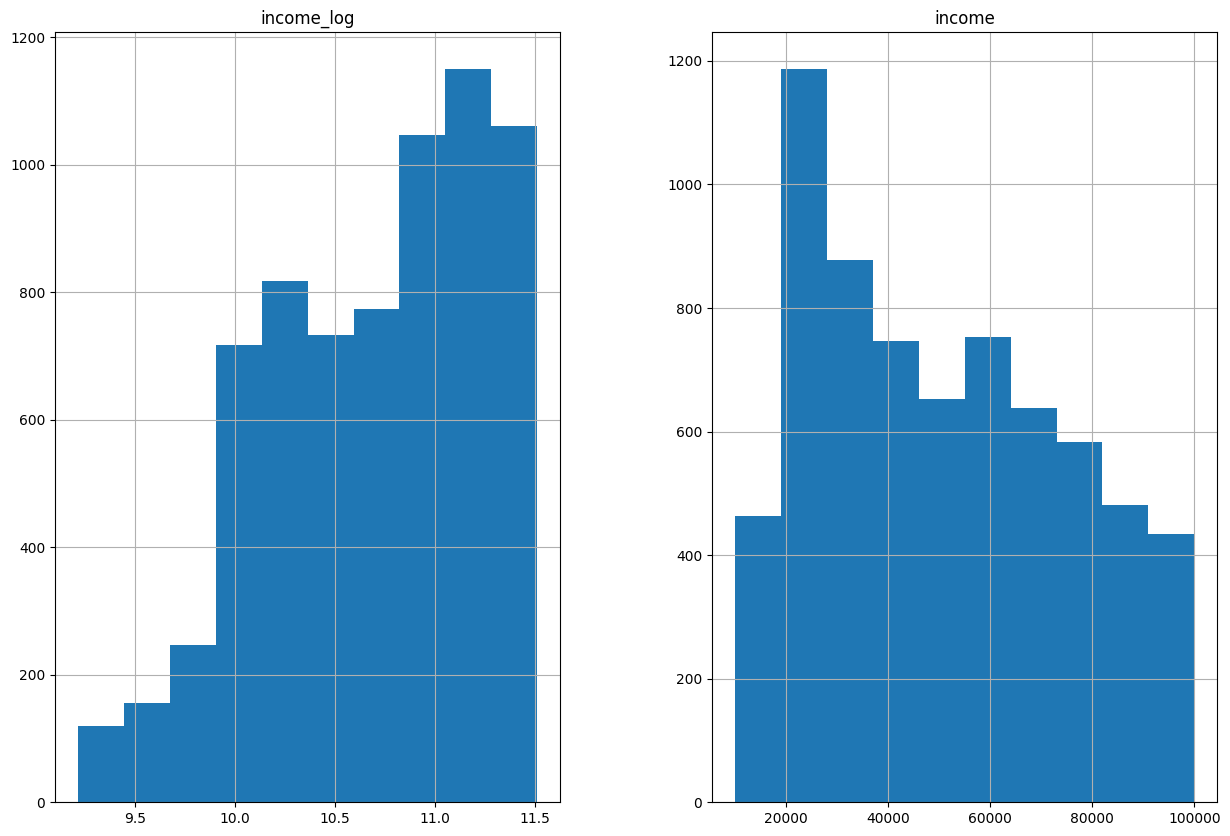

In [22]:
data.hist(column=["income_log","income"],figsize=(15,10))

The variable "income_log" presents a left-skewed distribution, opposite to the original distribution that was a rigth-skewed distribution.

array([[<Axes: title={'center': 'MPA_log'}>,
        <Axes: title={'center': 'monthly_premium_auto'}>]], dtype=object)

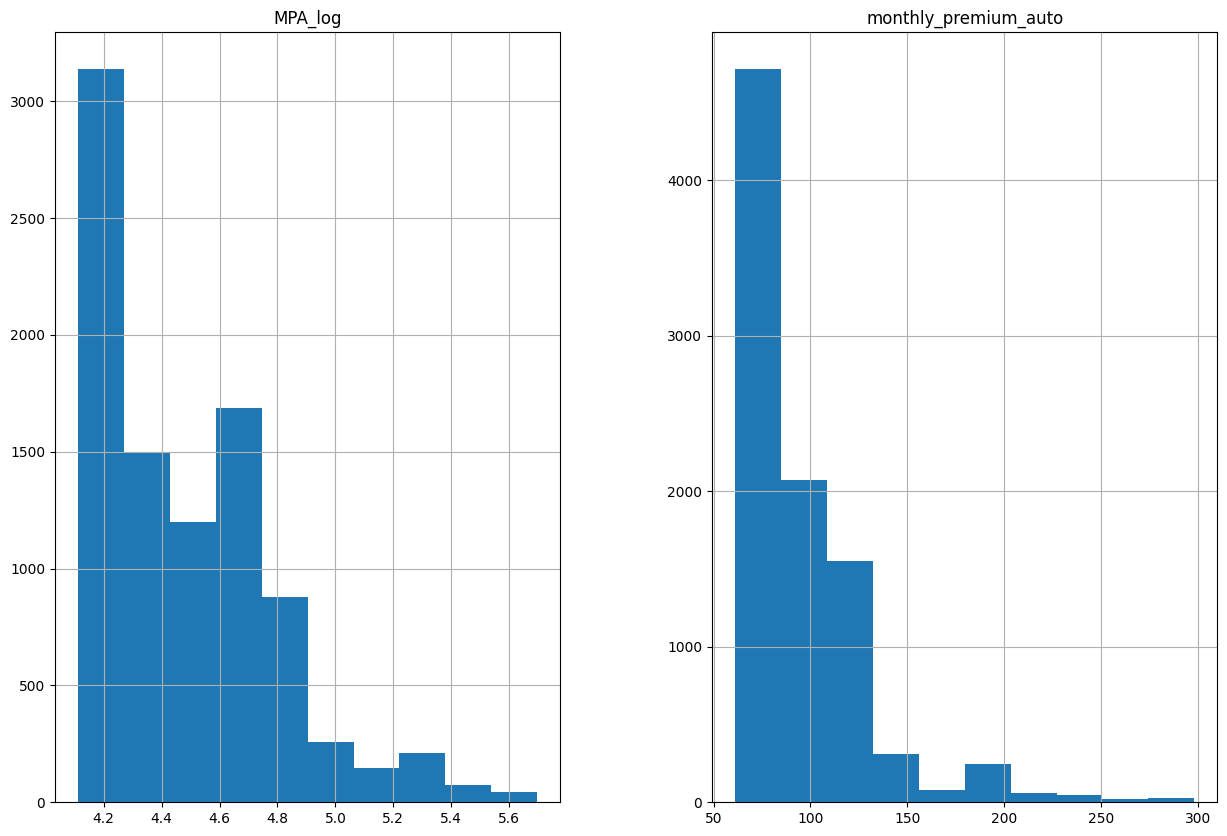

In [15]:
data.hist(column=["MPA_log","monthly_premium_auto"],figsize=(15,10))

The distribution of the variable (MPA_log) after the log transformation  is less skew, but it doesn't resemble a normal distribution

In [23]:
data=data[np.isfinite(data['MLC_log'])]

array([[<Axes: title={'center': 'MLC_log'}>,
        <Axes: title={'center': 'months_since_last_claim'}>]],
      dtype=object)

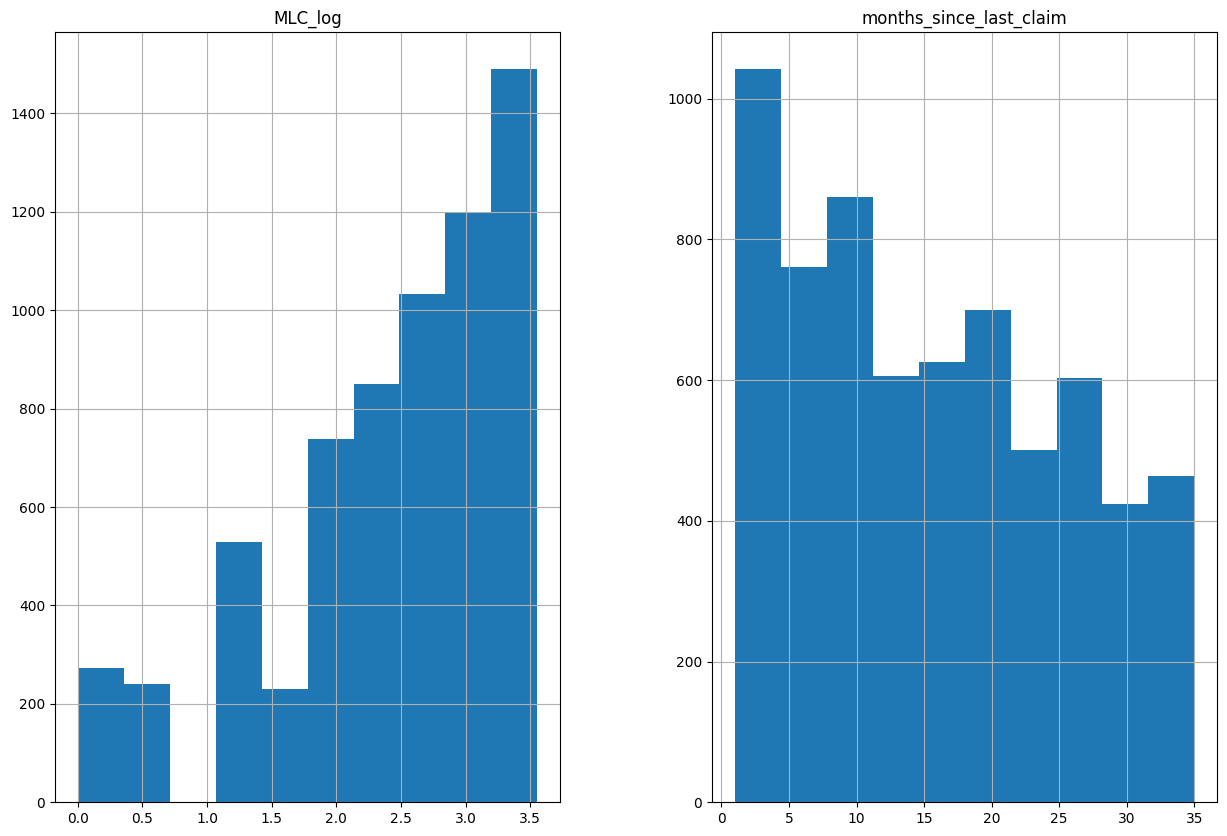

In [24]:
data.hist(column=["MLC_log","months_since_last_claim"],figsize=(15,10))

The variable "MLC_log" presents a left-skewed distribution, opposite to the original distribution that was a rigth-skewed distribution.

In [25]:
data=data[np.isfinite(data['NOC_log'])]

array([[<Axes: title={'center': 'NOC_log'}>,
        <Axes: title={'center': 'number_of_open_complaints'}>]],
      dtype=object)

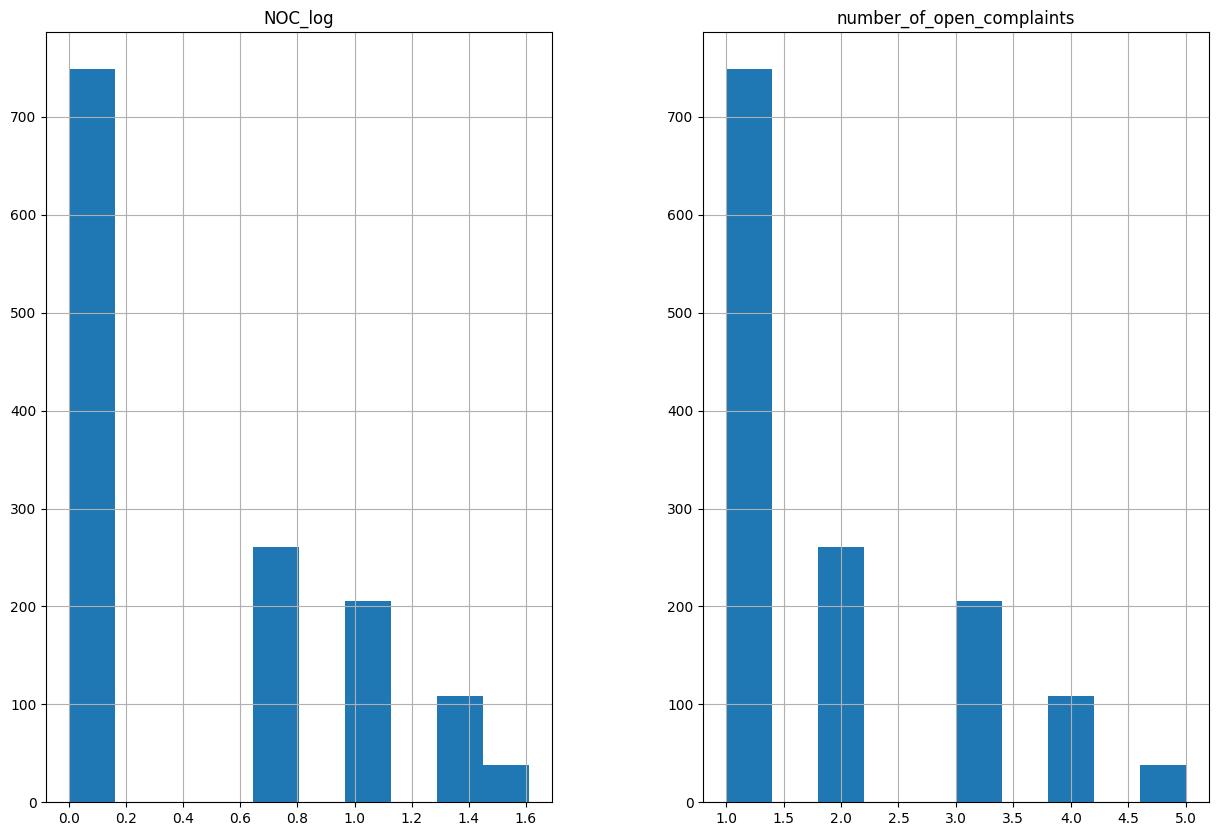

In [26]:
data.hist(column=["NOC_log","number_of_open_complaints"],figsize=(15,10))

The distribution of the variable (NOC_log) after the log transformation  is less skew, but it doesn't resemble a normal distribution

array([[<Axes: title={'center': 'NP_log'}>,
        <Axes: title={'center': 'number_of_policies'}>]], dtype=object)

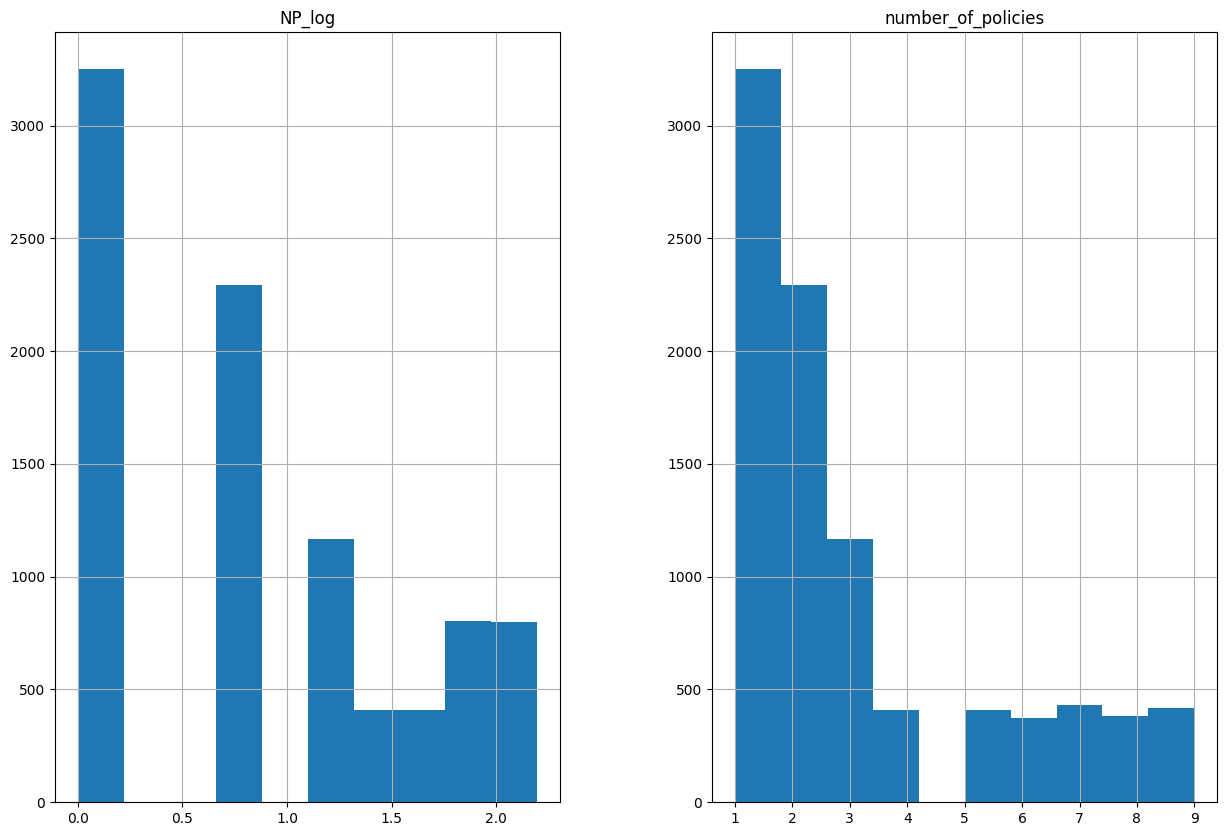

In [18]:

data.hist(column=["NP_log","number_of_policies"],figsize=(15,10))

The distribution of the variable (NP_log) after the log transformation  is less skew, but it doesn't resemble a normal distribution

We are going to use two different methods to test the uniformity of the variable "Months since policy inception"
Our hypothesis test is
H0: the variable is distributed uniformly
HA: the variable is not distributed uniformly 


In [27]:
from scipy.stats import kstest, uniform
ks_statistic, p_value = kstest(data['months_since_policy_inception'], 'uniform')
print(ks_statistic, p_value) 

0.9904622157006603 0.0


We can reject the null hypothesis, the variable is not uniformly distributed.

In [28]:
from scipy.stats import chisquare
stat, p_value = chisquare(data['months_since_policy_inception'])
print(stat, p_value)

22008.45709101148 0.0


We can reject the null hypothesis, the variable is not uniformly distributed.